In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [377]:
# Importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes.csv')

# Visualisasi data

In [378]:
# Preview data
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [379]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [380]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


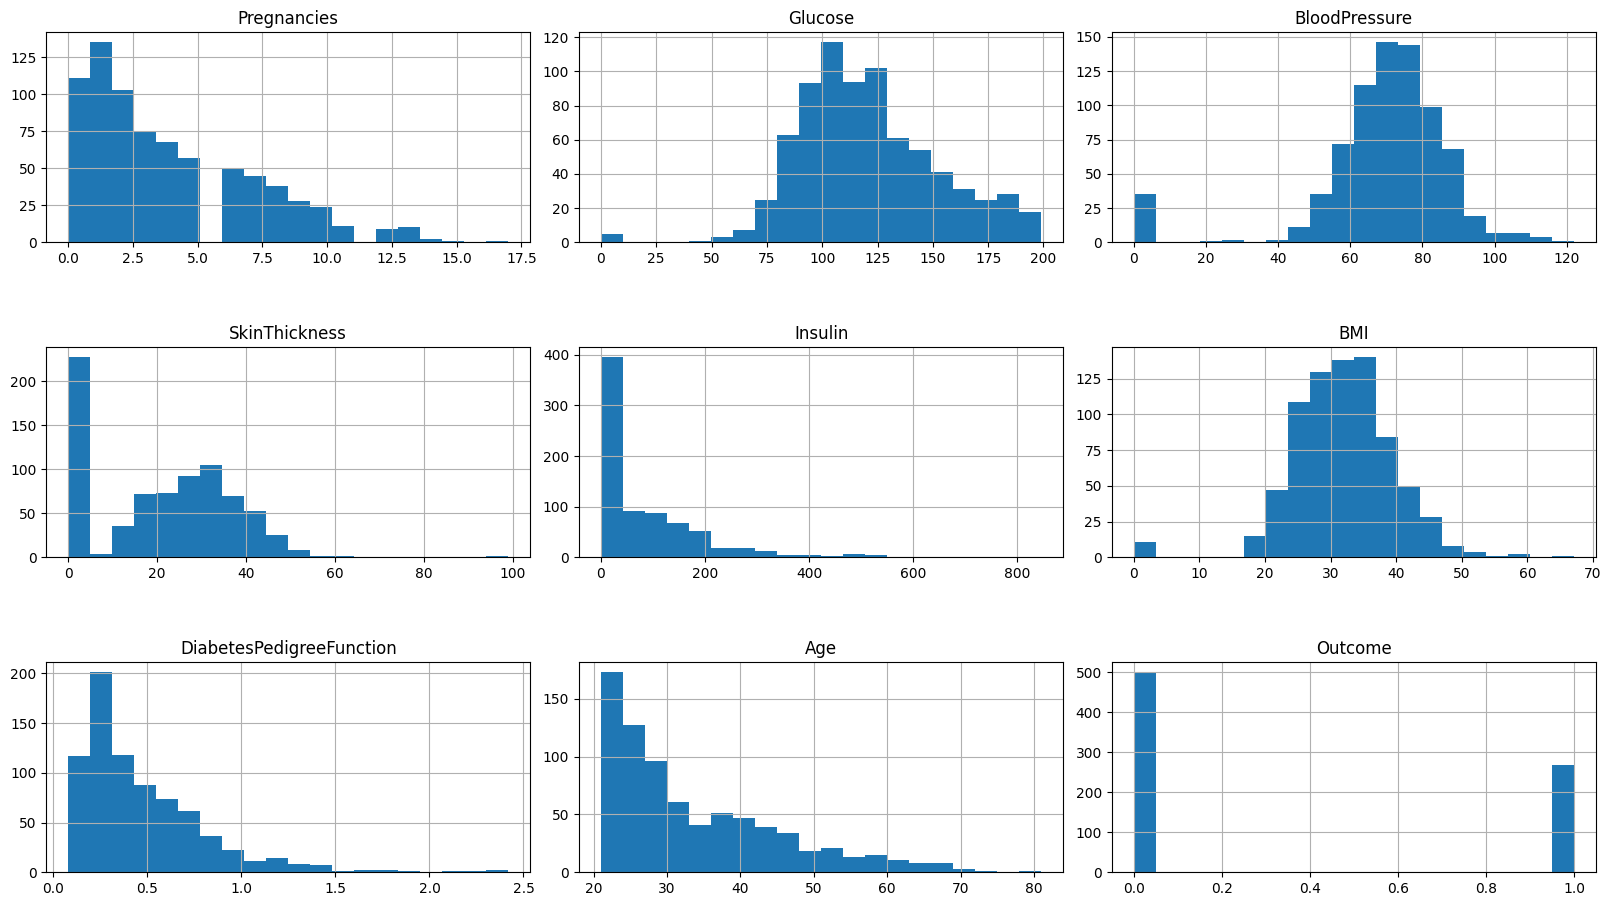

In [381]:
# Histogram dari setiap atribut data
import itertools

col = dataset.columns
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int(length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

# Isi missing value

In [382]:
dataset_new = dataset
# Mengganti nilai nol dengan NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [383]:
# Jumlah data NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [384]:
# Mencari indeks data dengan outcome 1 (a) dan 0 (b)
a = []
b = []
for x in dataset_new.index:
  if dataset_new['Outcome'][x] == 1:
    a.append(x)
  else:
    b.append(x)

In [385]:
# Mengganti NaN dengan nilai mean atau median
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing = 'median'
if missing == 'median':
  for feature in features:
    dataset_new[feature][a] = dataset_new[feature][a].fillna(dataset_new[feature][a].median())
    dataset_new[feature][b] = dataset_new[feature][b].fillna(dataset_new[feature][b].median())
elif missing == 'mean':
  for feature in features:
    dataset_new[feature][a] = dataset_new[feature][a].fillna(dataset_new[feature][a].mean())
    dataset_new[feature][b] = dataset_new[feature][b].fillna(dataset_new[feature][b].mean())

In [386]:
# Rangkuman statistik dataset
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Korelasi Fitur

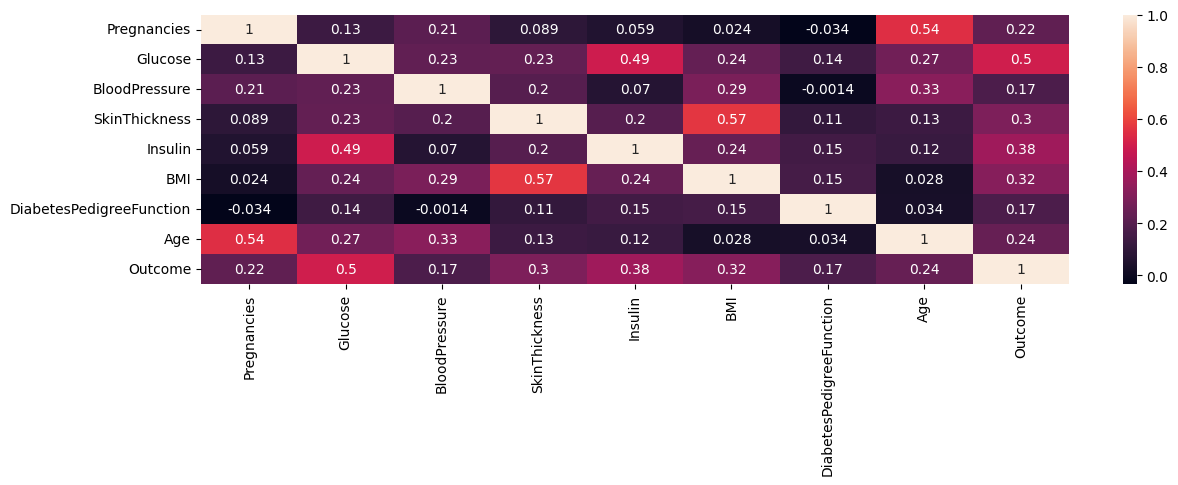

In [387]:
# Heatmap
sns.heatmap(dataset_new.corr(), annot = True)
plt.show()

Fitur dengan korelasi tertinggi terhadap output, yaitu Glucose, Insulin, BMI, SkinThickness, dan Age

In [388]:
# Memilih fitur yang akan digunakan - [Glucose(1), SkinThickness(3), Insulin(4), BMI(5), Age(7)]
X = dataset_new.iloc[:, [1, 4, 5, 7]].values
Y = dataset_new.iloc[:, 8].values

# Dataset Split

In [389]:
# Split dataset menjadi data train, valid, dan test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1, stratify = Y)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1, stratify = Y_train)

In [390]:
# Mencek dimensi dataset
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (460, 4)
Y_train shape: (460,)
X_valid shape: (154, 4)
Y_valid shape: (154,)
X_test shape: (154, 4)
Y_test shape: (154,)


In [391]:
sum_0 = np.where(Y_train == 0)
sum_1 = np.where(Y_train == 1)
print(len(sum_0[0]), len(sum_1[0]))

300 160


In [392]:
sum_0 = np.where(Y_valid == 0)
sum_1 = np.where(Y_valid == 1)
print(len(sum_0[0]), len(sum_1[0]))

100 54


In [393]:
sum_0 = np.where(Y_test == 0)
sum_1 = np.where(Y_test == 1)
print(len(sum_0[0]), len(sum_1[0]))

100 54


# Training

In [394]:
# Lokasi scaler dan model
filepath_scaler = '/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_scaler.joblib'
filepath_model = '/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_model.h5'

# Fungsi untuk early stopping dan checkpoint
myCheckpoint = ModelCheckpoint(filepath_model, monitor='val_accuracy', save_best_only=True, verbose=1)
myStopping = EarlyStopping(monitor='val_loss', patience=10)

## Oversampling

In [395]:
'''from imblearn.over_sampling import ADASYN
from collections import Counter

# Oversampling dengan ADASYN
ada = ADASYN(random_state=130)
X_train, Y_train = ada.fit_resample(X_train, Y_train)'''

'from imblearn.over_sampling import ADASYN\nfrom collections import Counter\n\n# Oversampling dengan ADASYN\nada = ADASYN(random_state=130)\nX_train, Y_train = ada.fit_resample(X_train, Y_train)'

In [396]:
sum_0 = np.where(Y_train == 0)
sum_1 = np.where(Y_train == 1)
print(len(sum_0[0]), len(sum_1[0]))

300 160


## Normalisasi

In [397]:
# Feature scaling menggunakan MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
# Simpan scaler
joblib.dump(sc, filepath_scaler)

['/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_scaler.joblib']

## Training Model

In [398]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                80        
                                                                 
 dense_34 (Dense)            (None, 32)                544       
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 657 (2.57 KB)
Trainable params: 657 (2.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [399]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=100,
                    batch_size=10,
                    callbacks = [myCheckpoint, myStopping])

Epoch 1/100
29/46 [=================>............] - ETA: 0s - loss: 0.6877 - accuracy: 0.5966  
Epoch 1: val_accuracy improved from -inf to 0.64935, saving model to /content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_model.h5
46/46 [==============================] - 3s 27ms/step - loss: 0.6783 - accuracy: 0.6457 - val_loss: 0.6661 - val_accuracy: 0.6494
Epoch 2/100
25/46 [===============>..............] - ETA: 0s - loss: 0.6689 - accuracy: 0.6280
Epoch 2: val_accuracy did not improve from 0.64935
46/46 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6522 - val_loss: 0.6505 - val_accuracy: 0.6494
Epoch 3/100
25/46 [===============>..............] - ETA: 0s - loss: 0.6432 - accuracy: 0.6600
Epoch 3: val_accuracy did not improve from 0.64935
46/46 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6522 - val_loss: 0.6357 - val_accuracy: 0.6494
Epoch 4/100
42/46 [==========================>...] - ETA: 0s - loss: 0.6237 - accurac

## Evaluasi

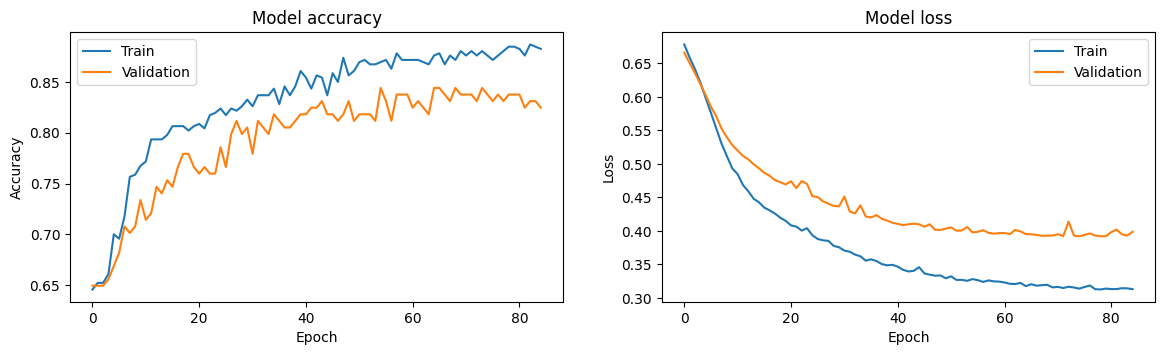

In [400]:
plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(122)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [401]:
train_loss, train_score = model.evaluate(X_train, Y_train, verbose=0)
valid_loss, valid_score = model.evaluate(X_valid, Y_valid, verbose=0)

print('Training loss       = %.2f' %(train_loss))
print('Training accuracy   = %.2f%%' %(train_score*100))
print('Validation loss     = %.2f' %(valid_loss))
print('Validation accuracy = %.2f%%' %(valid_score*100))

Training loss       = 0.31
Training accuracy   = 88.70%
Validation loss     = 0.40
Validation accuracy = 82.47%


# Testing

In [402]:
# Load scaler dan model terlatih
diabetes_scaler = joblib.load(filepath_scaler)
diabetes_model = load_model(filepath_model)

## Normalisasi

In [403]:
# Normaliasi data test
X_test = diabetes_scaler.transform(X_test)

## Test Model

In [404]:
test_loss, test_score = diabetes_model.evaluate(X_test, Y_test)

print('Test loss     = %.2f' %(test_loss))
print('Test accuracy = %.2f%%' %(test_score*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8701
Test loss     = 0.36
Test accuracy = 87.01%


5/5 [==============================] - 0s 3ms/step


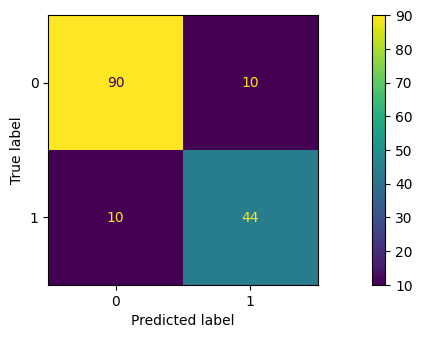

In [405]:
# Confusion matrix
y_predicted = diabetes_model.predict(X_test)
y_predicted = np.round(y_predicted.flatten())
conf_mat = confusion_matrix(Y_test, y_predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

# Klasifikasi

In [406]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [407]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Kelas untuk prediksi menggunakan ANN yang sudah dilatih
class ANN():
  def __init__ (self, loc_scaler, loc_model):
    self.diabetes_scaler = joblib.load(loc_scaler)
    self.diabetes_model = load_model(loc_model)

  def klasifikasi(self, data):
    data_scaled = self.diabetes_scaler.transform([data])
    predicted_score = self.diabetes_model.predict(data_scaled, verbose=0)
    round_score = np.round(predicted_score)
    if round_score == 1:
      predicted_class = 'Diabetes'
    else:
      predicted_class = 'Sehat'
    return predicted_score[0][0], predicted_class

glucose = 93
insulin = 102
height = 1.7
weight = 90
age = 50
bmi = weight / height**2
data = np.array([glucose, insulin, bmi, age])

filepath_scaler = '/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_scaler.joblib'
filepath_model = '/content/drive/MyDrive/Dataset/Diabetes Prediction/diabetes_model.h5'
ann_model = ANN(loc_scaler = filepath_scaler, loc_model = filepath_model)
score, label = ann_model.klasifikasi(data)
print('glucose :', glucose)
print('insulin :', insulin)
print('age     :', age)
print('bmi     :', bmi)
print(score, label)

glucose : 93
insulin : 102
age     : 50
bmi     : 31.14186851211073
0.06118519 Sehat
